# Sesión 03: Algorítmos no supervisados

## Reto 01: Construir funciones para nuestra librería de utilidades

PASO 1: Construye una función que calcula la distancia euclídea entre dos conjuntos de observaciones:

In [5]:
import numpy as np

def distEuclidiana(muestra, dataset):
    distancias = np.zeros((dataset.shape[0],1))
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra-dataset[counter])
    return distancias

In [6]:
#Prueba de distancia euclidiana:
muestra = np.array([1,2,3,4]) # Prueba la función con varios puntos
dataset = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])

distancias = distEuclidiana(muestra, dataset)
print(distancias)

[[0.]
 [2.]
 [4.]]


PASO 2: Definir una función que determine el centroide más cercano a un punto muestral

In [7]:
def centroideCercano(muestra, listaCentroides):
    listaDistancias = distEuclidiana(muestra, listaCentroides)
    centroideCercano = np.argmin(listaDistancias)
    return centroideCercano

In [136]:
#Prueba de centroide mas cercano:
muestra = np.array([1,2,3,4])
centroides = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])
resultado = centroideCercano(muestra, centroides)
print("El centroide más cercano es el ubicado en el índice: "+str(resultado))

El centroide más cercano es el ubicado en el índice: 0


PASO 3: Define una función que clasifique todas las muestras con base en el centroide más cercano

In [9]:
def clasificarPorCentroides(muestras, centroides):
    resultado = np.zeros((muestras.shape[0],1))
    for counter in range(0, muestras.shape[0]):
        resultado[counter] = centroideCercano(muestras[counter], centroides)
    return resultado

In [10]:
#Prueba de todos los centroides vs todas las muestras.
muestras = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])

centroides = np.array([[1,2,3,4],
                    [2,3,4,5],
                    [3,4,5,6]])

resultados = clasificarPorCentroides(muestras, centroides)
print(resultados)

[[0.]
 [1.]
 [2.]]


## Ejemplo 01: Entrenamiento de K-Means

Este ejemplo simple muestra como es que se puede hacer la división entre entrenamiento / prueba y como se entrena por medio de k-means usando la librería de Sklearn

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

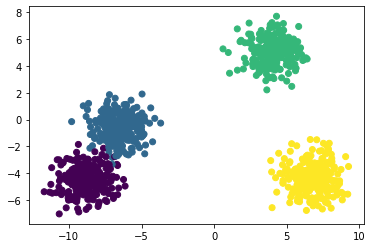

In [17]:
x, y = make_blobs(n_samples=1000, centers=4, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

Utilizaremos la función KMeans de Sklearn para aplicar la técnica no supervisada:

In [18]:
from sklearn.cluster import KMeans

Tomamos el dataset definimos los centroides. K es el número de clases que queremos, por ejemplo: n_clusters = 4 es para 4 clases

C:\Otro\Anaconda\envs\Class_test\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


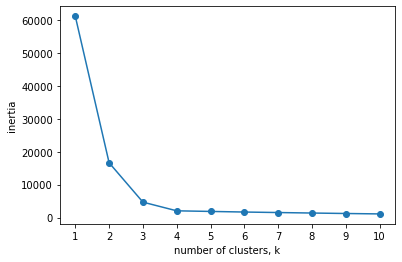

In [21]:
# Gráfica de sedimentación para determinar el número de clústeres
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(x)
    inertias.append(model.inertia_)
    
# Gráfico de sedimentación para ver las incercias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [23]:
# Definimos el número de centroides determinado
K = 4

# Determinamos el número de centróides y asignamos los datos
modelo_kmeans = KMeans(n_clusters = K)

modelo_kmeans.fit(x)

#Y extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[ 4.03559942  5.07549   ]
 [-6.47457206 -0.56262148]
 [ 6.74223159 -4.33103621]
 [-8.81174003 -4.51944705]]


$accuracy = \frac{num\ muestras - num\ errores}{num\ muestras} \times 100$

## Reto 02: Clasificación y desempeño

In [26]:
from sklearn.datasets import make_blobs

Definir una función que filtre los datos con base en la categoría esperada a la que pertenecen

In [45]:
def separarDatos(muestras, valoresEsperados, valorAFiltrar):
    indices = np.where(valoresEsperados == valorAFiltrar)
    return muestras[indices], valoresEsperados[indices]

In [46]:
np.where ([2,2] == [2,2])

(array([0], dtype=int64),)

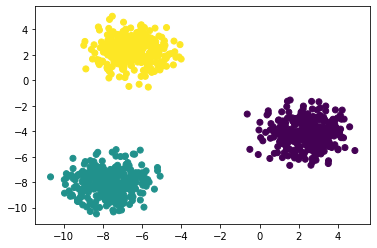

In [53]:
# Prueba de la función
x, y = make_blobs(n_samples=1000, centers=3, n_features=2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

La siguiente función calcula la moda de un conjunto de datos y nos será útil para calcular el accuracy de nuestra clasificación

In [54]:
muestrasCon1, valoresEsperadosCon1 = separarDatos(x,y,0) # Cambia el argumento "valorAFiltrar"
print(valoresEsperadosCon1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [55]:
from scipy import stats

def obtenerModa(resultados):
    moda = (stats.mode(resultados)[0]).reshape(-1)
    return moda[0]

Código para obtener la accuracy de una muestra con K medias
Este código primero extrae el numero de muestras, luego los resultados de clasificación, luego la moda y busca con np.where donde los resultados son diferentes a la moda, esos son los indices de errores.

Luego entonces, la cantidad de errores es el tamaño de los resultados donde los indicesErrores apuntan. finalmente, la Accuracy la calculamos como:

$accuracy = \frac{numMuestras - cantidadErrores}{numMuestras} \times 100 $

In [56]:
def obtenerAccuracy_kmedias(muestras, centroides):
    numMuestras = muestras.shape[0]
    
    resultados = clasificarPorCentroides(muestras, centroides)
    moda = obtenerModa(resultados)
    
    indicesErrores = np.where(resultados != moda)
    cantidadErrores = len(resultados[indicesErrores])
    accuracy = ((numMuestras - cantidadErrores) / numMuestras) *100
    return accuracy

Vamos a probar la función anterior. Para ello, observa el scatter plot de arriba, y elige los centroides manualmente con "centroidesDummy". si pones el centroide dummy 1 y 2 muy cerca, la accuracy va a bajar considerablemente. si pones el centroide dummy 1 en medio de una clase, y el centroide 2 muy lejos, la accuracy será de 100%

In [57]:
centroidesDummy = np.array([[0,0]       #Centroide dummy 1
                            ,[10,10]])   #Centroide dummy 2
accuracy = obtenerAccuracy_kmedias(muestrasCon1,centroidesDummy)
print(accuracy)

100.0


## Ejemplo 2: Sistemas de recomendación

Este es un sistema de recomendación: los sistemas de recomendación estan en todos lados (netflix, amazon, etc), y vamos a crear uno basado en K-medias. Para ello, vamos empezando por cargar un dataset de películas en formato CSV.

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [63]:
df_peliculas = pd.read_csv('../Datasets/dataset_peliculas.csv')
df_peliculas

,Nombre,cantidad de accion,cantidad de romance,tipo
0,Robocop,0.90,0.00,accion
1,Terminator,0.88,0.10,accion
2,Dia de la independencia,0.90,0.11,accion
3,Mision Imposible,0.90,0.11,accion
4,Bourne,0.90,0.20,accion
5,Rambo,1.00,0.00,accion
6,Rocky,0.95,0.40,accion
7,Leopold y Kate,0.10,1.00,romance
8,Diario de una pasión,0.10,0.90,romance
9,Operación Dragon,0.75,0.00,accion


### Transformando en datasets de entrenamiento y prueba.

Ahora, vamos a tomar las columnas "cantidad de accion" y "cantidad de romance", y vamos a transformarlas en nuestras variables a clasificar por K-medias. Como aqui tengo acción y romance, hay que mappear "accion" a 0, y "romance" a 1, para hacer un dataset de entrenamiento y prueba.

In [192]:
x = df_peliculas[['cantidad de accion', 'cantidad de romance']].to_numpy()
y = df_peliculas['tipo'].map({
    'accion':0,
    'romance':1
}).to_numpy()
# Otra alternativa: y = df_peliculas["tipo"].get_dummies()

# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

### Centroides.
Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [193]:
#plt.scatter(df_peliculas["cantidad de accion"], df_peliculas["cantidad de romance"])

In [194]:
modelo_kmeans = KMeans(n_clusters = 2)
modelo_kmeans.fit(x)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[0.89857143 0.14785714]
 [0.125      0.9175    ]]


### Sistema de recomendación.
Muy bien! ya tenemos los datos, centroides, y estamos listos para crear un sistema que nos recomiende películas. Para ello usaremos la librería MLUtilites que hemos estado construyendo en esta sesión.

In [195]:
import numpy as np

Esta función va a recibir la lista de todas las peliculas (solo el texto), los datos de todas las películas (igual que como sacamos X), la pelicula ejemplo (Los valores de cantidad de acción y cantidad de romance), y los centroides de Kmeans.

In [196]:
def recomiendamePeliculas(listaDePeliculas,datosPeliculas,peliculaEjemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = centroideCercano(peliculaEjemplo, centroides)
    
    #Luego, vamos a clasificar todas las peliculas por centroides.
    clasificaciones = clasificarPorCentroides(datosPeliculas, centroides)
    
    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]
    
    #Y regresamos la lista de peliculas.
    return listaDePeliculas[indices]

### Recomiendame una película!
Elige un índice del dataframe (por decir algo... 5), y extrae la película que elegiste. Luego extrae sus características, y pide las recomendaciones!

In [197]:
peliculaElegida[['cantidad de accion', 'cantidad de romance']].to_numpy()

array([0.9, 0.11], dtype=object)

In [198]:
#Sientete libre de cambiar este valor.
indice_df = 3

#Extrae la película que deseas del dataframe.
peliculaElegida = df_peliculas.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristicaPelicula = peliculaElegida[['cantidad de accion', 'cantidad de romance']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendamePeliculas(df_peliculas['Nombre'],x, caracteristicaPelicula, centroides)

#E imprime lo que hallaste!
print("Porque viste "+peliculaElegida['Nombre']+" te recomendamos ...")
print(recomendaciones.head())

Porque viste Mision Imposible te recomendamos ...
0                    Robocop
1                 Terminator
2    Dia de la independencia
3           Mision Imposible
4                     Bourne
Name: Nombre, dtype: object


## Postwork 3: Sistema de recomendación de canciones

In [185]:
from sklearn.cluster import KMeans

In [186]:
df_artistas = pd.read_csv('../Datasets/data_by_artist_o.csv')
print(df_artistas.head())
print(df_artistas.shape)

               artists  acousticness  danceability  duration_ms    energy  \
0  5 Seconds of Summer      0.043567      0.547308  195593.0769  0.804585   
1              50 Cent      0.122386      0.695039  234964.0899  0.762388   
2                AC/DC      0.027054      0.476390  258998.6163  0.847727   
3                 ACOT      0.000319      0.730000  169912.0000  0.567000   
4                  AFI      0.006557      0.390139  187259.2222  0.905722   

   instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0          0.000016  0.181711 -4.599892     0.104403  141.883923  0.520938   
1          0.000548  0.198361 -4.149427     0.259516  105.929427  0.589770   
2          0.210036  0.280974 -4.818866     0.069395  128.038802  0.508220   
3          0.000009  0.105000 -8.085000     0.058700  119.997000  0.171000   
4          0.031634  0.222553 -5.111389     0.087367  127.025750  0.444339   

   popularity  
0   61.015385  
1   52.342697  
2   51.401163  
3   

In [187]:
df_artistas.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity'],
      dtype='object')

In [188]:
features = ['acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity']

In [189]:
x = df_artistas[features].to_numpy()
x

array([[4.35673540e-02, 5.47307692e-01, 1.95593077e+05, ...,
        1.41883923e+02, 5.20938462e-01, 6.10153846e+01],
       [1.22386348e-01, 6.95039326e-01, 2.34964090e+05, ...,
        1.05929427e+02, 5.89769663e-01, 5.23426966e+01],
       [2.70536390e-02, 4.76389535e-01, 2.58998616e+05, ...,
        1.28038802e+02, 5.08219767e-01, 5.14011628e+01],
       ...,
       [9.35000000e-01, 1.38000000e-01, 2.27200000e+05, ...,
        7.80920000e+01, 9.47000000e-02, 1.90000000e+01],
       [9.69000000e-01, 3.60000000e-01, 1.88240000e+05, ...,
        1.05031000e+02, 1.62000000e-01, 4.00000000e+00],
       [9.82333333e-01, 4.96333333e-01, 1.81977667e+05, ...,
        1.30833333e+02, 5.16333333e-01, 7.33333333e+00]])

---

In [97]:
modelo_kmeans = KMeans(n_clusters = 100)
modelo_kmeans.fit(x)
centroides = modelo_kmeans.cluster_centers_
#print(centroides)

---

### Ejemplo

#Extrae la película que deseas del dataframe.
peliculaElegida = df_peliculas.iloc[indice_df]

#Obten las características de la pelicula que elegiste.
caracteristicaPelicula = peliculaElegida[['cantidad de accion', 'cantidad de romance']].to_numpy()

---

In [92]:
#Sientete libre de cambiar este valor.
indice = 67

#Extrae la película que deseas del dataframe.
ArtistaElegida = df_artistas.iloc[indice]

#Obten las características de la pelicula que elegiste.
caracteristicaArtista = ArtistaElegida[features].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendamePeliculas(df_artistas['artists'],x, caracteristicaArtista, centroides)

#E imprime lo que hallaste!
print("Porque viste "+ArtistaElegida['artists']+" te recomendamos ...")
print(recomendaciones.head())

Porque viste Acerina Y Su Danzonera te recomendamos ...
3                        ACOT
67     Acerina Y Su Danzonera
71                 Acid Ghost
129            Adolphe Bérard
130        Adolphus Hailstork
Name: artists, dtype: object
